<h1>Angle Analysis from Data</h1>

<h2>Initialize</h2>

In [4]:
import os
import sys
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yaml
import ipywidgets as widgets
from ipywidgets import Button, Layout

sys.path.append(os.getcwd() + '/../src/')
import AnalysisTools
# reload(AnalysisTools)
dt = AnalysisTools.DataTools()

ParameterFolder = os.getcwd()+'/../Parameters'
FitsFolder = os.getcwd()+'/../Fits'
FiguresFolder = os.getcwd()+'/../Figures'
BinnedFolder = os.getcwd()+'/../../Binned/BT2'

##### Plotly settings #####

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook+plotly_mimetype'
pio.templates.default = 'simple_white'
pio.templates[pio.templates.default].layout.update(dict(
    title_y = 0.95,
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top',
    legend_x = 0,
    legend_y = 1,
    legend_traceorder = "normal",
    legend_bgcolor='rgba(0,0,0,0)',
    margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=50, #top margin
        )
));

##### Functions #####

# Create angle array
def AngleFunction(theta) :
    return (np.sin((theta)/180*np.pi))**2 / (0.5+((np.cos((theta)/180*np.pi))**2/2))

##### Print files in folder #####

print('Data files:')
FileList = dt.FileList(FitsFolder,[''])
for Name in FileList :
    print('    '+Name)

Data files:
    Angles.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D1000_E100 - Pi Star.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D1000_E100 - Shape Resonance.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D1000_E200 - Shape Resonance.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D1000_E50 - Pi Star.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D1000_E50 - Shape Resonance.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D1000_E500 - Shape Resonance.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D1000_E500_N - Shape Resonance.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D1000_E50_N - Pi Star.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D100_E50 - Shape Resonance.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D2000_E100 - Shape Resonance.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D50_E100 - Pi Star.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D50_E100 - Shape Resonance.hdf
    CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D50_E100_N - Shape Resonance.hdf
    CO-O-Ru Hor 2-1 - 

<h2>Load data</h2>

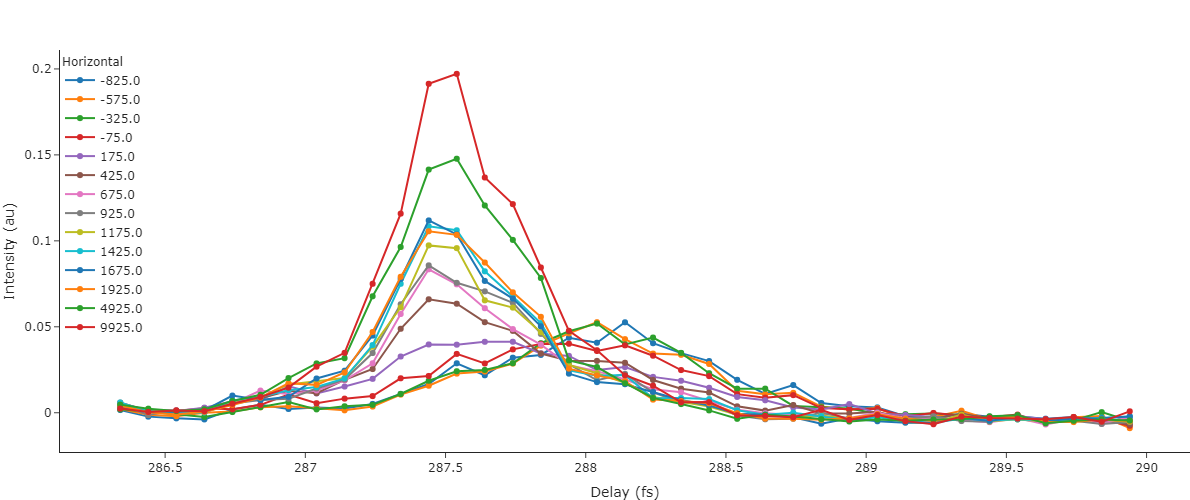

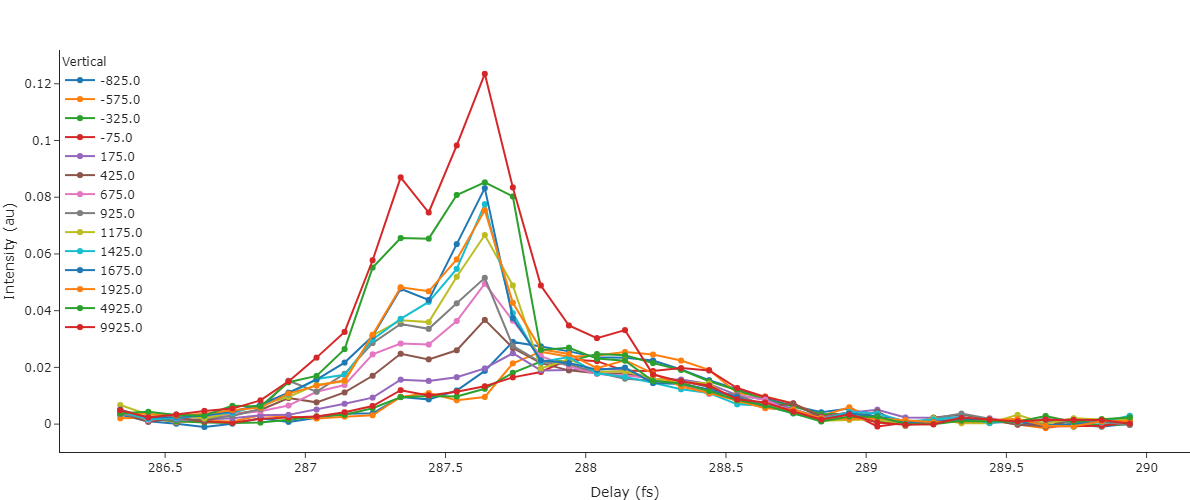

In [2]:
# Load data
Hor_File = 'CO-O-Ru Hor 2-1 - Simple - XAS_014_014_D50_E100 - Pi Star.hdf'
Ver_File = 'CO-O-Ru Ver 2-1 - Simple - XAS_000_000_D50_E100 - Pi Star.hdf'

Hor_Data = pd.read_hdf(FitsFolder+'/'+Hor_File,'Data')
Ver_Data = pd.read_hdf(FitsFolder+'/'+Ver_File,'Data')

# Plot horizontal data
fig = px.scatter(Hor_Data)
fig.update_traces(mode='lines+markers')
fig.update_layout(xaxis_title='Delay (fs)',legend_title='Horizontal',yaxis_title='Intensity (au)',height=500)
fig.show()

# Plot vertical data
fig = px.scatter(Ver_Data)
fig.update_traces(mode='lines+markers')
fig.update_layout(xaxis_title='Delay (fs)',legend_title='Vertical',yaxis_title='Intensity (au)',height=500)
fig.show()

# Angles and ratios
Angle = np.linspace(0,90,1001)
Ratio = AngleFunction(Angle)

<h2>Angle analysis</h2>

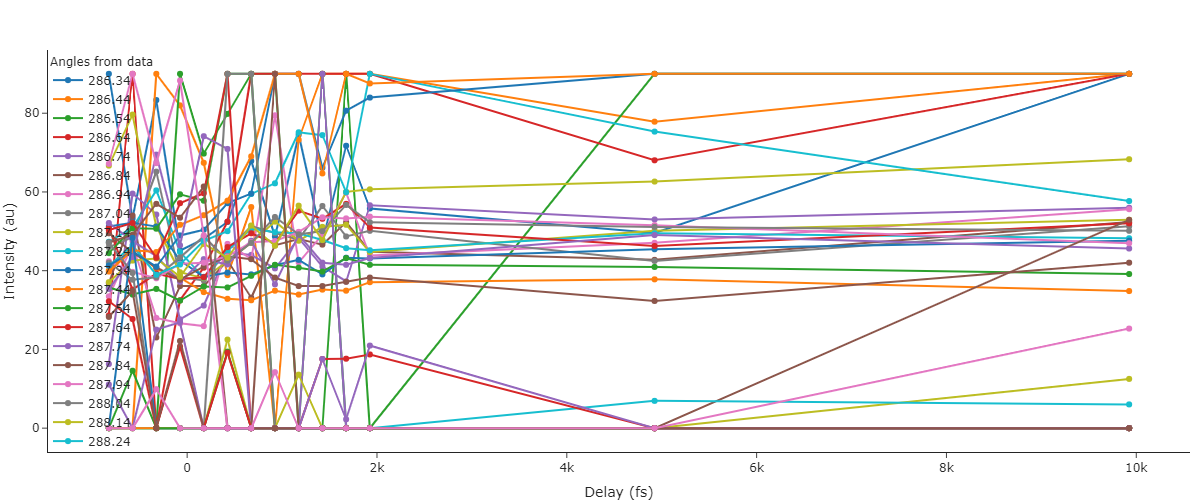

In [3]:
Ratios_Data = Ver_Data.T/Hor_Data.T
Ratios_Data.columns = np.round(Ratios_Data.columns,2)
Angles_Data = pd.DataFrame(index=Ratios_Data.index,columns=Ratios_Data.columns)

# Calculate angles from surface normal
for Energy in Ratios_Data :
    for Delay in Ratios_Data[Energy].index.values :
        index = (np.abs(Ratio - Ratios_Data[Energy].loc[Delay])).argmin()
        Angles_Data[Energy].loc[Delay] = Angle[index]

# Plot angles from data
fig = px.scatter(Angles_Data)
fig.update_traces(mode='lines+markers')
fig.update_layout(xaxis_title='Delay (fs)',yaxis_title='Intensity (au)',legend_title='Angles from data',height=500)
fig.show()

<p>0 degrees indicates that CO is in the vertical position and 90 degrees indicates that it is in the horizontal position.</p>

<h2>File info</h2>

This script analyzes the CO surface angle from different Fermi data sets. 

-----------------------
Created by Devon Ball, deball@chapman.edu, 07/2020

Last modified by Jerry LaRue, larue@chapman.edu, 01/2021